In [1]:
from numpy import *
from scipy.stats import norm
import math 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def uoc_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d1 = (log(s/k)+mus*t)/(vol*sqrt(t))
    d2 = d1-vol*sqrt(t)
    d3 = (log((bu**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    b1 = (log(s/bu)+mus*t)/(vol*sqrt(t))
    b2 = b1 - vol*sqrt(t)
    ib1 = (log(bu/s)+mus*t)/(vol*sqrt(t))
    ib2 = ib1 - vol*sqrt(t)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    Nd3 = norm.cdf(d3)
    Nd4 = norm.cdf(d4)
    Nb1 = norm.cdf(b1)
    Nb2 = norm.cdf(b2)
    Nib1 = norm.cdf(ib1)
    Nib2 = norm.cdf(ib2)
    
    return s*((Nd1-Nb1)-(bu/s)**(((2*r)/(vol**2))+1)*(Nd3-Nib1))-k*exp(-r*t)*((Nd2-Nb2)-(bu/s)**(((2*r)/(vol**2))-1)*(Nd4-Nib2))

In [3]:
uoc_cf(100,100,125,75,0.02,0.2,1)

2.0649713950568831

In [4]:
def uoc_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
        
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bu<exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[-1]
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/u
    
    if criticals < bu:
        j=0
    else:
        j=1
        
    for i in range(inbarrier[-1],inbarrier[0]-1,-1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint+j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(1-exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(exp(logs[i])-k,0))
        
    return exp(-r*t)*sum(wp)

In [5]:
uoc_tree(100,100,125,75,0.02,0.2,1,0.005)

2.1097903590776217

In [6]:
def uic_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d3 = (log((bu**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    b1 = (log(s/bu)+mus*t)/(vol*sqrt(t))
    b2 = b1 - vol*sqrt(t)
    ib1 = (log(bu/s)+mus*t)/(vol*sqrt(t))
    ib2 = ib1 - vol*sqrt(t)
    nNd3 = norm.cdf(-d3)
    nNd4 = norm.cdf(-d4)
    nNb1 = norm.cdf(-b1)
    nNb2 = norm.cdf(-b2)
    nNib1 = norm.cdf(-ib1)
    nNib2 = norm.cdf(-ib2)
    
    return s*(1-nNb1+(bu/s)**(2*mus/(vol**2))*(nNib1-nNd3))-k*exp(-r*t)*(1-nNb2+(bu/s)**(2*mu/(vol**2))*(nNib2-nNd4))

In [7]:
uic_cf(100,100,125,75,0.02,0.2,1)

6.8510658835156484

In [8]:
def uic_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
        
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bu<exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[-1]
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/u
    
    if criticals < bu:
        j=0
    else:
        j=1
        
    for i in range(inbarrier[-1],inbarrier[0]-1,-1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint+j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(exp(logs[i])-k,0))
        
    return exp(-r*t)*sum(wp)

In [9]:
uic_tree(100,100,125,75,0.02,0.2,1,0.0005)

6.8417996970776258

In [10]:
def doc_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d1 = (log(s/k)+mus*t)/(vol*sqrt(t))
    d2 = d1-vol*sqrt(t)
    d3 = (log((bl**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    Nd3 = norm.cdf(d3)
    Nd4 = norm.cdf(d4)
    
    return s*(Nd1-(bl/s)**(2*mus/(vol**2))*Nd3)-k*exp(-r*t)*(Nd2-(bl/s)**(2*mu/(vol**2))*Nd4)

In [11]:
doc_cf(100,100,125,75,0.02,0.2,1)

8.9038746636649435

In [12]:
def doc_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
        
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bl>exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[0]
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/d
    
    if criticals > bl:
        j=0
    else:
        j=1
        
    for i in range(inbarrier[0],inbarrier[-1]+1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint-j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(1-exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(exp(logs[i])-k,0))
        
    return exp(-r*t)*sum(wp)

In [13]:
doc_tree(100,100,125,75,0.02,0.2,1,0.005)

8.8978259145502498

In [14]:
def dic_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d3 = (log((bl**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    Nd3 = norm.cdf(d3)
    Nd4 = norm.cdf(d4)
    
    return s*((bl/s)**((2*mus)/(vol**2)))*Nd3-k*exp(-r*t)*((bl/s)**(2*mu/(vol**2)))*Nd4

In [15]:
dic_cf(100,100,125,75,0.02,0.2,1)

0.012162614907596125

In [16]:
def dic_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
        
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bl>exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[0]
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/d
    
    if criticals > bl:
        j=0
    else:
        j=1
        
    for i in range(inbarrier[0],inbarrier[-1]+1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint-j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(exp(logs[i])-k,0))
        
    return exp(-r*t)*sum(wp)

In [17]:
dic_tree(100,100,125,75,0.02,0.2,1,0.005)

0.0083111786035643207

In [18]:
def uop_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d1 = (log(s/k)+mus*t)/(vol*sqrt(t))
    d2 = d1-vol*sqrt(t)
    d3 = (log((bu**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    nNd1 = norm.cdf(-d1)
    nNd2 = norm.cdf(-d2)
    nNd3 = norm.cdf(-d3)
    nNd4 = norm.cdf(-d4)

    return s*(-nNd1+(bu/s)**(2*mus/(vol**2))*nNd3)-k*exp(-r*t)*(-nNd2+(bu/s)**(2*mu/(vol**2))*nNd4)

In [19]:
uop_cf(100,100,125,75,0.02,0.2,1)

6.8536190057515824

In [20]:
def uop_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
        
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bu<exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[-1]
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/u
    
    if criticals < bu:
        j=0
    else:
        j=1
        
    for i in range(inbarrier[-1],inbarrier[0]-1,-1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint+j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(1-exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(k-exp(logs[i]),0))
        
    return exp(-r*t)*sum(wp)

In [21]:
uop_tree(100,100,125,75,0.02,0.2,1,0.005)

6.852727088094972

In [22]:
def uip_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d3 = (log((bu**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    nNd3 = norm.cdf(-d3)
    nNd4 = norm.cdf(-d4)
    
    return -s*(bu/s)**(2*mus/(vol**2))*nNd3+k*exp(-r*t)*(bu/s)**(2*mu/(vol**2))*nNd4

In [23]:
uip_cf(100,100,125,75,0.02,0.2,1)

0.082285603496479842

In [24]:
def uip_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
        
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bu<exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[-1]
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/u
    
    if criticals < bu:
        j=0
    else:
        j=1
        
    for i in range(inbarrier[-1],inbarrier[0]-1,-1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint+j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(k-exp(logs[i]),0))
        
    return exp(-r*t)*sum(wp)

In [25]:
uip_tree(100,100,125,75,0.02,0.2,1,0.005)

0.073277335734080309

In [26]:
def dop_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d1 = (log(s/k)+mus*t)/(vol*sqrt(t))
    d2 = d1-vol*sqrt(t)
    d3 = (log((bl**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    b1 = (log(s/bl)+mus*t)/(vol*sqrt(t))
    b2 = b1 - vol*sqrt(t)
    ib1 = (log(bl/s)+mus*t)/(vol*sqrt(t))
    ib2 = ib1 - vol*sqrt(t)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    Nd3 = norm.cdf(d3)
    Nd4 = norm.cdf(d4)
    Nb1 = norm.cdf(b1)
    Nb2 = norm.cdf(b2)
    Nib1 = norm.cdf(ib1)
    Nib2 = norm.cdf(ib2)
    
    return s*((Nd1-Nb1)-(bl/s)**(2*mus/(vol**2))*(Nd3-Nib1))-k*exp(-r*t)*((Nd2-Nb2)-(bl/s)**(2*mu/(vol**2))*(Nd4-Nib2))

In [27]:
dop_cf(100,100,125,75,0.02,0.2,1)

3.3191672413906588

In [28]:
def dop_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
        
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bl>exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[0]
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/d
    
    if criticals > bl:
        j=0
    else:
        j=1
        
    for i in range(inbarrier[0],inbarrier[-1]+1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint-j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(1-exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(k-exp(logs[i]),0))
        
    return exp(-r*t)*sum(wp)

In [29]:
dop_tree(100,100,125,75,0.02,0.2,1,0.005)

3.5270629277126084

In [30]:
def dip_cf(s,k,bu,bl,r,vol,t):
    mu = (r-0.5*vol**2)
    mus = (r+0.5*vol**2)
    d3 = (log((bl**2)/(s*k))+mus*t)/(vol*sqrt(t))
    d4 = d3-vol*sqrt(t)
    b1 = (log(s/bl)+mus*t)/(vol*sqrt(t))
    b2 = b1 - vol*sqrt(t)
    ib1 = (log(bl/s)+mus*t)/(vol*sqrt(t))
    ib2 = ib1 - vol*sqrt(t)
    Nd3 = norm.cdf(d3)
    Nd4 = norm.cdf(d4)
    Nb1 = norm.cdf(b1)
    Nb2 = norm.cdf(b2)
    Nib1 = norm.cdf(ib1)
    Nib2 = norm.cdf(ib2)
    
    return s*(Nb1+(bl/s)**(2*mus/(vol**2))*(Nd3-Nib1)-1)-k*exp(-r*t)*(Nb2+(bl/s)**(2*mu/(vol**2))*(Nd4-Nib2)-1)

In [31]:
dip_cf(100,100,125,75,0.02,0.2,1)

3.6167373678573949

In [32]:
def dip_tree(s,k,bu,bl,r,vol,t,tstep):
    u = exp(vol*sqrt(tstep))
    d=1/u
    R=exp(r*tstep)
    p=(R-d)/(u-d)
    q=1-p
    n=int(t/tstep)
    
    logs=[]
    logtp=[]
    proba=[]
    for i in range(n+1):
        logs.append(log(s)+n*log(u))
        logtp.append(0)
        proba.append(n*log(p))
    
    for i in range(1,n+1):
        logs[i]=logs[i]+2*(i)*log(d)
        logtp[i]=log((n+1-i)/i)+logtp[i-1]
        proba[i]=proba[i-1]-log(p)+log(q)
    
    logvtp=[]
    for i in range(n+1):
        logvtp.append(-math.inf)
        
    inbarrier=[]    
    for i in range(n+1):
        if bl>exp(logs[i]):
            inbarrier.append(i)
            
    criticalpoint = inbarrier[0];
    logvtp[criticalpoint] = logtp[criticalpoint]
    criticals = exp(logs[criticalpoint])/d
    
    if criticals > bl : j=0
    else:j=1
        
    for i in range(inbarrier[0],inbarrier[-1]+1):
        logvtp[i]=logtp[i]
        logvtp[criticalpoint-j]=logvtp[i]
        j = j+1
        
    pathprob=[]    
    for i in range(n+1):
        pathprob.append(exp(logvtp[i]-logtp[i]))
    
    wp=[]
    for i in range(n+1):
        wp.append(pathprob[i]*exp(proba[i]+logtp[i])*max(k-exp(logs[i]),0))
        
    return exp(-r*t)*sum(wp)

In [33]:
dip_tree(100,100,125,75,0.02,0.2,1,0.005)

3.3989414961164433

In [34]:
tstept=[]
for i in arange(0.0001,0.0051,0.0001):
    tstept.append(uoc_tree(100,100,125,75,0.02,0.2,1,i))

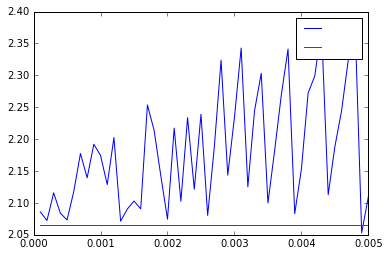

In [35]:
plt.plot(arange(0.0001,0.0051,0.0001),tstept,label='      ')
plt.plot(arange(0.0001,0.0051,0.0001),[uoc_cf(100,100,125,75,0.02,0.2,1)]*50,'r',label='      ')
plt.legend()

In [36]:
st=[]
for i in range(90,111):
    st.append(uoc_tree(i,100,125,75,0.02,0.2,1,0.0002))

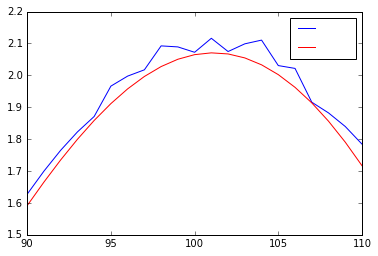

In [37]:
plt.plot(range(90,111),st,label='      ')
plt.plot(arange(90,111),uoc_cf(arange(90,111),100,125,75,0.02,0.2,1),'r',label='      ')
plt.legend()

In [38]:
kt=[]
for i in range(90,111):
    kt.append(uoc_tree(100,i,125,75,0.02,0.2,1,0.0002))

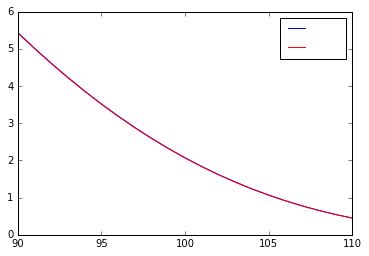

In [39]:
plt.plot(range(90,111),kt,label='      ')
plt.plot(arange(90,111),uoc_cf(100,arange(90,111),125,75,0.02,0.2,1),'r',label='      ')
plt.legend()

In [40]:
but=[]
for i in range(115,136):
    but.append(uoc_tree(100,100,i,75,0.02,0.2,1,0.0002))

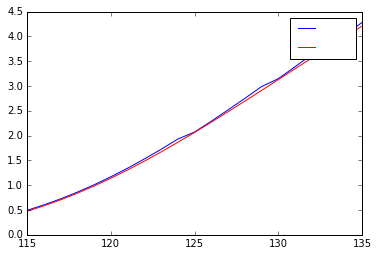

In [41]:
plt.plot(range(115,136),but,label='      ')
plt.plot(arange(115,136),uoc_cf(100,100,arange(115,136),75,0.02,0.2,1),'r',label='      ')
plt.legend()

In [42]:
rt=[]
for i in arange(0.01,0.03,0.001):
    rt.append(uoc_tree(100,100,125,75,i,0.2,1,0.0002))

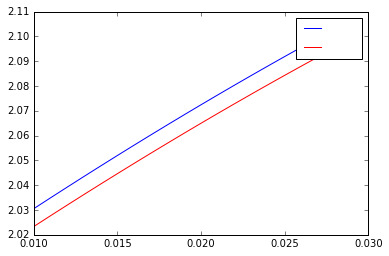

In [43]:
plt.plot(arange(0.01,0.03,0.001),rt,label='      ')
plt.plot(arange(0.01,0.03,0.001),uoc_cf(100,100,125,75,arange(0.01,0.03,0.001),0.2,1),'r',label='      ')
plt.legend()

In [44]:
tt=[]
for i in arange(0.25,1.25,0.01):
    tt.append(uoc_tree(100,100,125,75,0.02,0.2,i,0.0002))

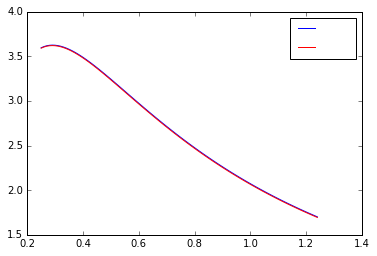

In [45]:
plt.plot(arange(0.25,1.25,0.01),tt,label='      ')
plt.plot(arange(0.25,1.25,0.01),uoc_cf(100,100,125,75,0.02,0.2,arange(0.25,1.25,0.01)),'r',label='      ')
plt.legend()

In [46]:
volt=[]
for i in arange(0.1,0.3,0.01):
    volt.append(uoc_tree(100,100,125,75,0.02,i,1,0.0002))

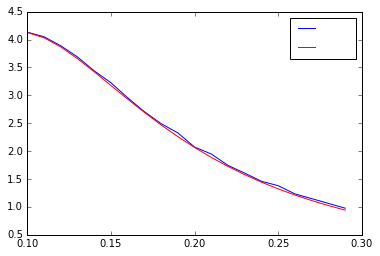

In [47]:
plt.plot(arange(0.1,0.3,0.01),volt,label='      ')
plt.plot(arange(0.1,0.3,0.01),uoc_cf(100,100,125,75,0.02,arange(0.1,0.3,0.01),1),'r',label='      ')
plt.legend()